In [1]:
#Email Spam Detection

In [7]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("emails.csv")
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [8]:
df.shape

(5728, 2)

In [9]:
df.columns

Index(['text', 'spam'], dtype='object')

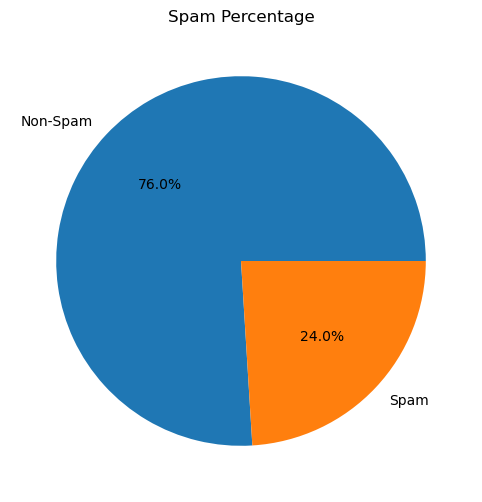

In [14]:
spam_percentage = df['spam'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
plt.pie(spam_percentage, labels=['Non-Spam', 'Spam'], autopct='%1.1f%%')
plt.title("Spam Percentage")
plt.show()

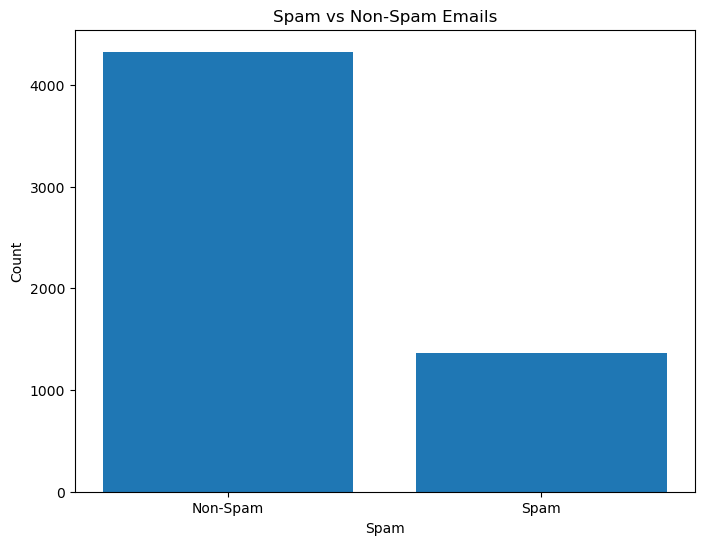

In [15]:
spam_counts = df['spam'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(spam_counts.index, spam_counts.values)
plt.xlabel("Spam")
plt.ylabel("Count")
plt.title("Spam vs Non-Spam Emails")
plt.xticks(spam_counts.index, ['Non-Spam', 'Spam'])
plt.show()

In [10]:
df.drop_duplicates(inplace=True)
print(df.shape)

(5695, 2)


In [11]:
# to show the number of missing data
print(df.isnull().sum())

text    0
spam    0
dtype: int64


In [12]:
# download the stopwords package
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/csuftitan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
def process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean
# to show the tokenization
df['text'].head().apply(process)

0    [Subject, naturally, irresistible, corporate, ...
1    [Subject, stock, trading, gunslinger, fanny, m...
2    [Subject, unbelievable, new, homes, made, easy...
3    [Subject, 4, color, printing, special, request...
4    [Subject, money, get, software, cds, software,...
Name: text, dtype: object

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer=process)
message = vectorizer.fit_transform(df['text'])

In [18]:
from wordcloud import WordCloud

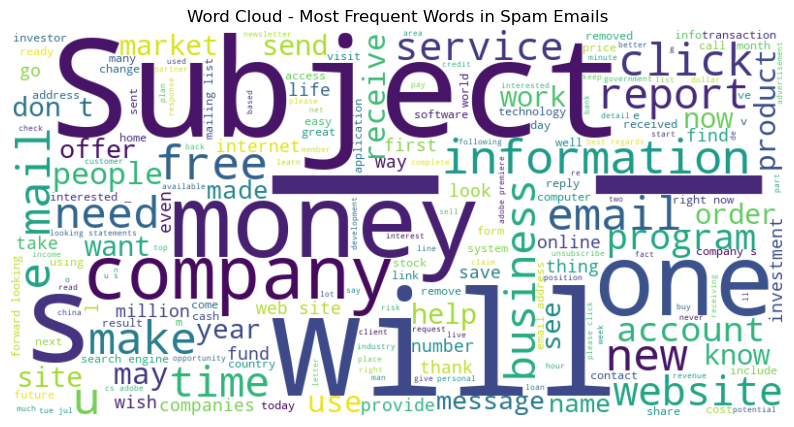

In [19]:
spam_text = " ".join(df[df['spam'] == 1]['text'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(spam_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Most Frequent Words in Spam Emails")
plt.show()

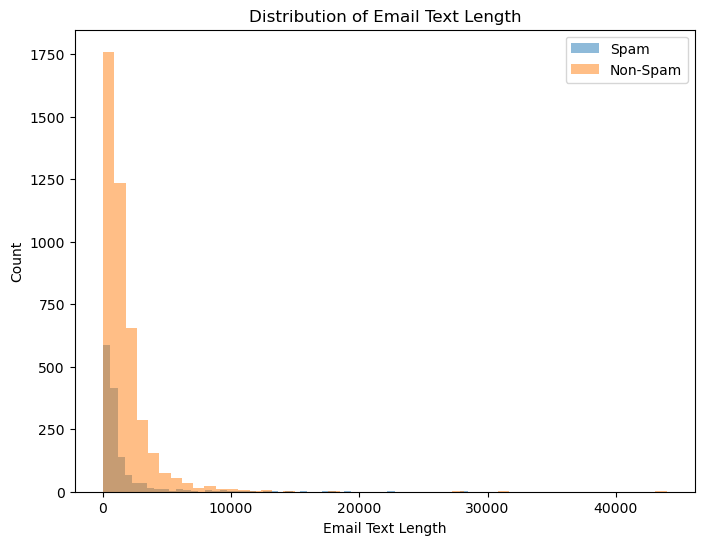

In [20]:
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(8, 6))
plt.hist(df[df['spam'] == 1]['text_length'], bins=50, alpha=0.5, label='Spam')
plt.hist(df[df['spam'] == 0]['text_length'], bins=50, alpha=0.5, label='Non-Spam')
plt.xlabel("Email Text Length")
plt.ylabel("Count")
plt.title("Distribution of Email Text Length")
plt.legend()
plt.show()

In [21]:
#split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(message, df['spam'], test_size=0.20, random_state=0)
print(message.shape)

(5695, 37229)


In [27]:
# create and train the Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(xtrain, ytrain)

In [29]:
# Get the predicted probabilities for training data
prob_train = classifier.predict_proba(xtrain)

# Print the predicted probabilities for a subset of training instances
num_instances = min(10, len(ytrain))  # Set the maximum number of instances to display
for i in range(num_instances):
    print("Email:", df['text'].iloc[i])
    print("Actual Spam Flag:", ytrain.iloc[i])
    print("Predicted Probabilities:")
    print("Non-Spam:", prob_train[i][0])
    print("Spam:", prob_train[i][1])
    print("-----------------------------------")

Email: Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : yo

In [23]:
# Evaluating the model on the training data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(xtrain)
print(classification_report(ytrain, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytrain, pred))
print("Accuracy: \n", accuracy_score(ytrain, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3457
           1       0.99      1.00      0.99      1099

    accuracy                           1.00      4556
   macro avg       0.99      1.00      1.00      4556
weighted avg       1.00      1.00      1.00      4556


Confusion Matrix: 
 [[3445   12]
 [   1 1098]]
Accuracy: 
 0.9971466198419666


In [26]:
# Evaluating the model on the testing data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(xtest)
print(classification_report(ytest, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytest, pred))
print("Accuracy: \n", accuracy_score(ytest, pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       870
           1       0.97      1.00      0.98       269

    accuracy                           0.99      1139
   macro avg       0.98      0.99      0.99      1139
weighted avg       0.99      0.99      0.99      1139


Confusion Matrix: 
 [[862   8]
 [  1 268]]
Accuracy: 
 0.9920983318700615
